In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile as scpio

In [2]:
amp=np.iinfo(np.int16).max
N=44100

In [3]:
sndr,sndd=scpio.read("55saw.wav")

(44100, 2)


C:\ProgramData\Anaconda3\lib\site-packages\scipy\io\wavfile.py:273: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)


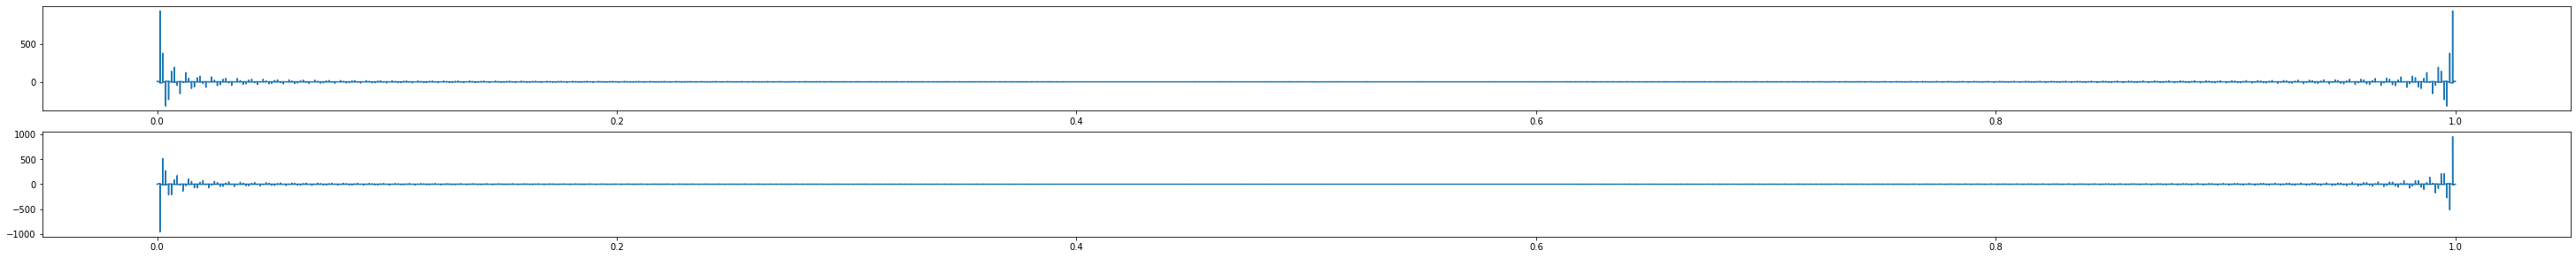

In [4]:
sndspec=np.fft.ifft(sndd[:,0])
hsndspec0=sndspec[:int(len(sndspec)/2)]
hsndspec1=sndspec[int(len(sndspec)/2):][::-1]
#sndspec=sndspec[0:int(len(sndspec)/2)]
pa,pb=plt.subplots(2,1,figsize=(8*6.4,4.8))
pb[0].plot(np.linspace(0,1,N),np.real(sndspec))
pb[1].plot(np.linspace(0,1,N),np.imag(sndspec))

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


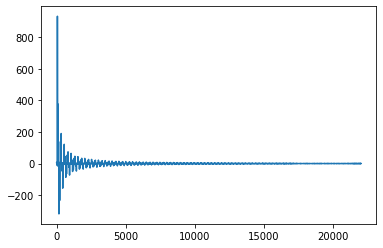

In [5]:
plt.plot(range(int(N/2)),hsndspec1)

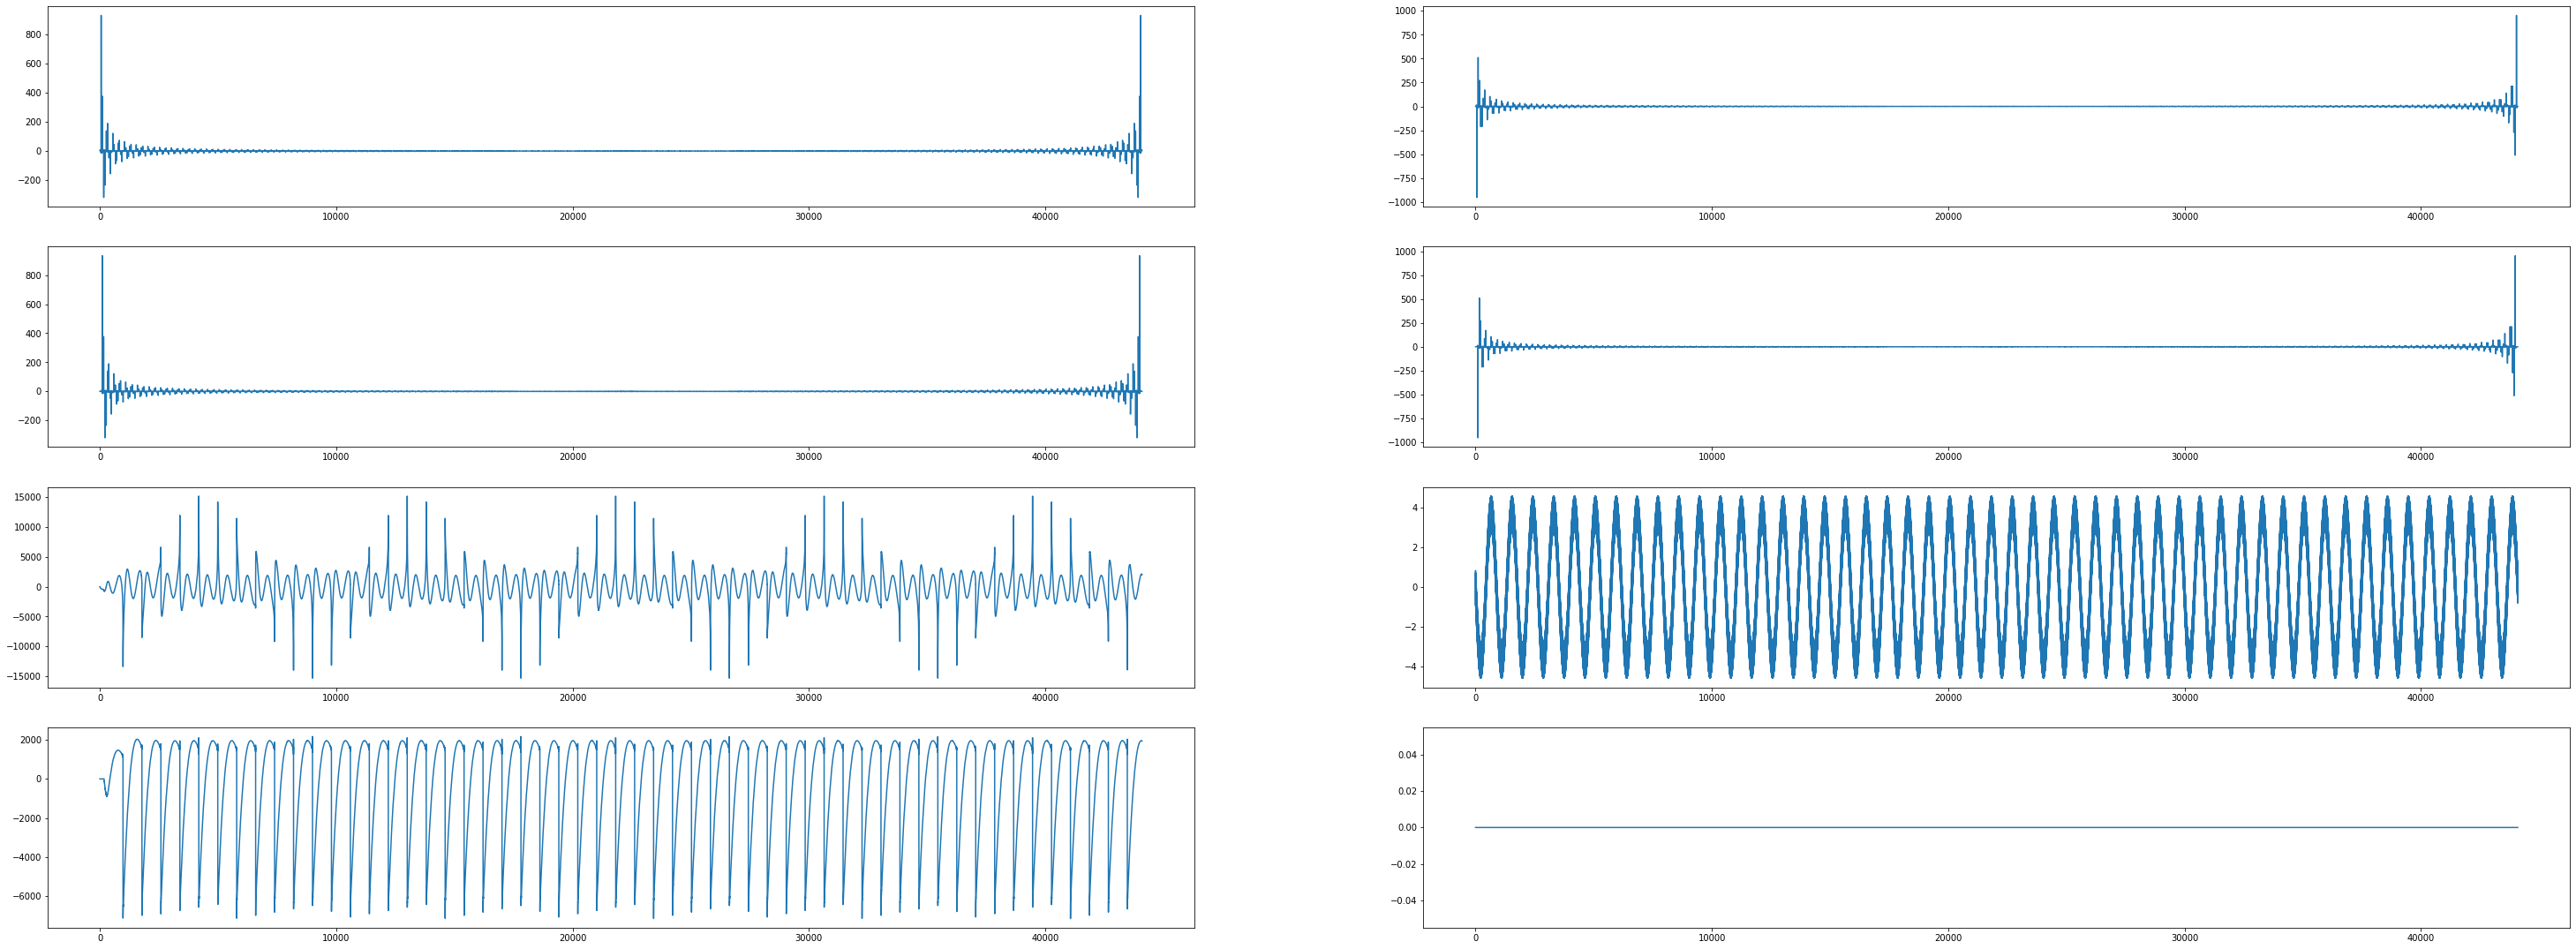

In [25]:
M=3000
inp=np.zeros(M,dtype=complex)
inp[50]=1
hconv0=np.convolve(inp,hsndspec0)
hconv1=np.convolve(inp,hsndspec1)
clen=2*len(hconv0)
hclen=len(hconv0)
#plt.plot(range(len(hconv)),np.real(hconv))
#plt.plot(range(len(hconv)),np.imag(hconv))
conv=np.zeros(int(N),dtype = complex)

for i in range(int(N/2)):
    conv[i]=hconv0[i]#np.real(hconv[i])*1+np.imag(hconv[i])*1j
    conv[N-i-1]=hconv1[i]
    #conv[N-i-1]=-np.real(hconv[i])*1+np.imag(hconv[i])*1j
#plt.plot(range(clen),conv)
outls=np.fft.fft(conv)
#ls=np.linspace(0,1,len(conv))
pa,pb=plt.subplots(4,2,figsize=(8*6.4,4*4.8))
pb[0,0].plot(range(len(sndspec)),np.real(sndspec))
pb[0,1].plot(range(len(sndspec)),np.imag(sndspec))
pb[1,0].plot(range(len(conv)),np.real(conv))
pb[1,1].plot(range(len(conv)),np.imag(conv))

#pb[2,0].plot(range(len(np.real(outls))),np.real(conv)-np.real(sndspec))
#pb[2,1].plot(range(len(np.real(outls))),np.imag(conv)-np.imag(sndspec))
pb[2,0].plot(range(len(np.real(outls))),np.real(outls))
pb[2,1].plot(range(len(np.real(outls))),np.imag(outls))
pb[3,0].plot(range(len(sndd[:,0])),np.real(sndd[:,0]))
pb[3,1].plot(range(len(sndd[:,0])),np.imag(sndd[:,0]))
#a=0
#for i in zip(sndspec,conv):
    #if i[0]==i[1]:
        #a+=1

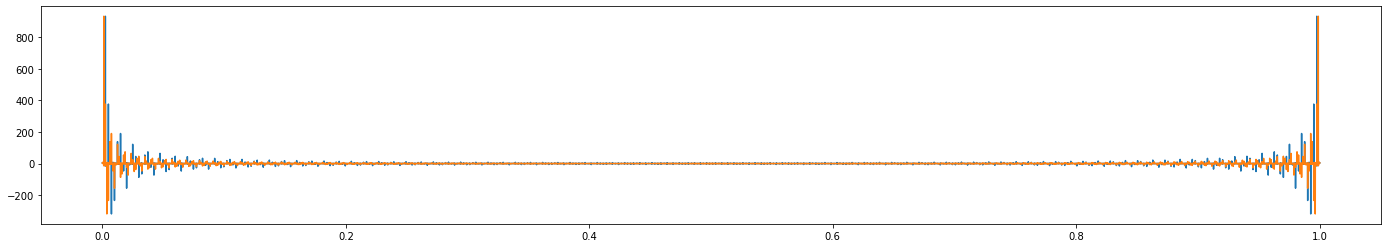

In [40]:
c=np.fft.ifft(sndd[:,0][::2])
cc,ccc=plt.subplots(1,1,figsize=(24,4))
ccc.plot(np.linspace(0,1,len(c)),c)
ccc.plot(np.linspace(0,1,2*len(c)),np.real(sndspec))

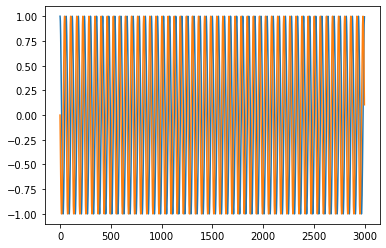

In [28]:
inpspec=np.fft.fft(inp)
plt.plot(range(len(inpspec)),np.real(inpspec))
plt.plot(range(len(inpspec)),np.imag(inpspec))

In [18]:
scpio.write("qm_out0.wav",N,np.real(outls).astype(np.int16))